# Multi-class classification of intrusion in IDS using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem: multi-class classification of intrusion in IDS

Raw data from: CIC-IDS-2017 [1]

-----------------------------------------------------------------------
[1] Iman Sharafaldin et al. Toward generating a new intrusion detection dataset and intrusion traffic characterization. ICISSp, 1:108–116, 2018.

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [12]:
df = pd.read_csv("../cnsm_final_datasets/ids_cic_multiclass.csv")

In [13]:
df

,Unnamed: 0,index,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,0,ff02::1:2,fe80::6d07:ea13:6f73:ed41,20,0,2060,0,1.499429e+09,1.499429e+09,547,546,163,163.0,0.000000,0,-1.000000,163.00,163.00,163,163,0,163,0.000000,0,0.000000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,False,0.301030,0.0,1.0,0.550000,0.875000,17.606277,32.011393,0.000019,32.011403,32.011410,1.684811,0.000002,9.536743e-07,32.011359,0.052632,True,0.000000,False,0.0,1.0,1793,1.0,True,163,0.000011,-2.169255e+13,4.075619e+13,0.008256,0.008057,2.054117e+10,8.478452e+11,1.772407e+13,1.027058e+14,NaN,6.361159e+06,127555.760160,0.008057,0.007112,NaN,NaN,1984.122308,1.192864e+14,-0.000199,5.673240e-14,BENIGN
1,1,1,192.168.10.255,192.168.10.25,36,0,7776,0,1.499429e+09,1.499429e+09,138,138,276,276.0,0.000000,0,-1.000000,276.00,276.00,276,276,0,276,0.000000,0,0.000000,276.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,False,0.301030,0.0,1.0,0.666240,0.875000,20.248109,30.352675,0.000060,30.391601,30.391613,0.868332,0.000002,9.536743e-07,30.352596,0.028608,True,0.000000,False,0.0,1.0,6624,1.0,True,276,0.000047,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,BENIGN
2,2,2,13.78.188.147,192.168.10.14,15,0,7118,0,1.499429e+09,1.499429e+09,443,49442,534,881.0,406.987715,165640,-0.134978,60.00,897.00,60,945,885,60,76.214928,386,72.284644,663.568334,0.466667,0.533333,1.164654,1.771552,-0.436380,7.911427e-09,8.819036e-09,-0.132616,0.980343,2.282589,0.584247,0.723222,False,0.802060,0.0,0.0,0.421537,0.375000,0.412525,0.411548,0.130263,0.676120,0.978622,0.069902,0.072875,7.050037e-04,0.124533,0.561310,False,1.714286,False,0.0,0.0,8018,1.0,False,0,0.000000,4.635747e-01,5.417682e-01,0.999801,0.149508,5.289119e-01,1.840534e-02,5.417600e-01,2.644559e+03,2427.727179,2.657057e+04,-8887.782747,0.006667,0.495092,0.284281,-0.022448,1.024307,8.116715e-02,-0.850293,7.979590e-01,BENIGN
3,3,3,192.168.10.14,13.78.188.147,13,0,5852,0,1.499429e+09,1.499429e+09,49442,443,510,305.0,482.231272,232547,-0.027986,289.00,417.00,60,1520,1460,289,94.555151,362,70.980392,689.141383,0.769231,0.230769,0.458286,2.540275,1.060541,1.371894e-09,1.557723e-09,-2.453125,3.076312,2.777363,0.750549,0.671154,True,0.909752,0.0,0.0,0.430102,0.375000,0.369769,0.305000,0.066748,0.607308,0.859725,0.071644,0.076293,4.816055e-05,0.154162,0.464730,False,1.333333,True,0.0,0.0,6632,1.0,False,0,0.000000,2.432243e-01,2.593818e-01,0.006667,0.804711,2.518095e-01,5.471546e-03,2.593700e-01,1.259048e+03,2504.566025,7.652101e+03,-370.725100,0.006667,0.508904,0.286044,0.020387,1.030072,2.495717e-02,0.798044,9.998273e-01,BENIGN
4,4,4,65.152.202.208,192.168.10.14,4,0,287,0,1.499429e+09,1.499429e+09,80,49435,131,60.0,143.499129,20593,0.045534,60.00,131.75,60,347,287,60,109.54

In [14]:
df.LABEL.value_counts()

BENIGN                        1699049
DDoS                           182672
DoS Slowhttptest                77419
DoS GoldenEye                   71372
DoS slowloris                   69569
DoS Hulk                        69043
FTP-Patator                      7982
SSH-Patator                      5960
Bot                              2470
PortScan                         1611
Web Attack – Brute Force         1596
Web Attack – XSS                  681
Infiltration                       44
Web Attack – Sql Injection         24
Heartbleed                         10
Name: LABEL, dtype: int64

In [15]:
df.loc[df.LABEL == "Web Attack – Sql Injection", "LABEL"] = "Web Attack"
df.loc[df.LABEL == "Web Attack – XSS", "LABEL"] = "Web Attack"
df.loc[df.LABEL == "Web Attack – Brute Force", "LABEL"] = "Web Attack"

df.loc[df.LABEL == "DoS Slowhttptest", "LABEL"] = "DDoS"
df.loc[df.LABEL == "DoS GoldenEye", "LABEL"] = "DDoS"
df.loc[df.LABEL == "DoS slowloris", "LABEL"] = "DDoS"
df.loc[df.LABEL == "DoS Hulk", "LABEL"] = "DDoS"

In [16]:
df.LABEL.value_counts()

BENIGN          1699049
DDoS             470075
FTP-Patator        7982
SSH-Patator        5960
Bot                2470
Web Attack         2301
PortScan           1611
Infiltration         44
Heartbleed           10
Name: LABEL, dtype: int64

In [17]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [18]:
import sklearn
pd.set_option('display.max_columns', None)


def handle_df(df):
    
    bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


    for F in features:
        if F in bool_features:
            continue
        # if F in distribution_features:
        #     df.replace([np.inf], 0.5, inplace=True)
        #     df.replace([-np.inf], 0.5, inplace=True)
        #     df.loc[df[F].isnull(), F] = 0.5
        # elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
        #     df.replace([np.inf], 0.5, inplace=True)
        #     df.replace([-np.inf], 0.5, inplace=True)
        #     df.loc[df[F].isnull(), F] = 0.5
        # elif F in frequency_features: 
        #     df.replace([np.inf], -1, inplace=True)
        #     df.replace([-np.inf], -1, inplace=True)
        #     df.loc[df[F].isnull(), F] = -1
        # else:
        #     df.replace([np.inf], 0, inplace=True)
        #     df.replace([-np.inf], 0, inplace=True)
        #     df.loc[df[F].isnull(), F] = 0


    for F in bool_features:
        df.loc[df[F].isnull(), F] = False
        df[F] = df[F].astype('bool')
    
    return df

df = handle_df(df)

In [19]:
df

,Unnamed: 0,index,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,0,ff02::1:2,fe80::6d07:ea13:6f73:ed41,20,0,2060,0,1.499429e+09,1.499429e+09,547,546,163,163.0,0.000000,0,-1.000000,163.00,163.00,163,163,0,163,0.000000,0,0.000000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,False,0.301030,0.0,1.0,0.550000,0.875000,17.606277,32.011393,0.000019,32.011403,32.011410,1.684811,0.000002,9.536743e-07,32.011359,0.052632,True,0.000000,False,0.0,1.0,1793,1.0,True,163,0.000011,-2.169255e+13,4.075619e+13,0.008256,0.008057,2.054117e+10,8.478452e+11,1.772407e+13,1.027058e+14,NaN,6.361159e+06,127555.760160,0.008057,0.007112,NaN,NaN,1984.122308,1.192864e+14,-0.000199,True,BENIGN
1,1,1,192.168.10.255,192.168.10.25,36,0,7776,0,1.499429e+09,1.499429e+09,138,138,276,276.0,0.000000,0,-1.000000,276.00,276.00,276,276,0,276,0.000000,0,0.000000,276.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,False,0.301030,0.0,1.0,0.666240,0.875000,20.248109,30.352675,0.000060,30.391601,30.391613,0.868332,0.000002,9.536743e-07,30.352596,0.028608,True,0.000000,False,0.0,1.0,6624,1.0,True,276,0.000047,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,False,BENIGN
2,2,2,13.78.188.147,192.168.10.14,15,0,7118,0,1.499429e+09,1.499429e+09,443,49442,534,881.0,406.987715,165640,-0.134978,60.00,897.00,60,945,885,60,76.214928,386,72.284644,663.568334,0.466667,0.533333,1.164654,1.771552,-0.436380,7.911427e-09,8.819036e-09,-0.132616,0.980343,2.282589,0.584247,0.723222,False,0.802060,0.0,0.0,0.421537,0.375000,0.412525,0.411548,0.130263,0.676120,0.978622,0.069902,0.072875,7.050037e-04,0.124533,0.561310,False,1.714286,False,0.0,0.0,8018,1.0,False,0,0.000000,4.635747e-01,5.417682e-01,0.999801,0.149508,5.289119e-01,1.840534e-02,5.417600e-01,2.644559e+03,2427.727179,2.657057e+04,-8887.782747,0.006667,0.495092,0.284281,-0.022448,1.024307,8.116715e-02,-0.850293,True,BENIGN
3,3,3,192.168.10.14,13.78.188.147,13,0,5852,0,1.499429e+09,1.499429e+09,49442,443,510,305.0,482.231272,232547,-0.027986,289.00,417.00,60,1520,1460,289,94.555151,362,70.980392,689.141383,0.769231,0.230769,0.458286,2.540275,1.060541,1.371894e-09,1.557723e-09,-2.453125,3.076312,2.777363,0.750549,0.671154,True,0.909752,0.0,0.0,0.430102,0.375000,0.369769,0.305000,0.066748,0.607308,0.859725,0.071644,0.076293,4.816055e-05,0.154162,0.464730,False,1.333333,True,0.0,0.0,6632,1.0,False,0,0.000000,2.432243e-01,2.593818e-01,0.006667,0.804711,2.518095e-01,5.471546e-03,2.593700e-01,1.259048e+03,2504.566025,7.652101e+03,-370.725100,0.006667,0.508904,0.286044,0.020387,1.030072,2.495717e-02,0.798044,True,BENIGN
4,4,4,65.152.202.208,192.168.10.14,4,0,287,0,1.499429e+09,1.499429e+09,80,49435,131,60.0,143.499129,20593,0.045534,60.00,131.75,60,347,287,60,109.541320,107,81.679389,181

In [20]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    for f in features:
        df[f] = df[f][indices_to_keep].astype(np.float64)
    return df
# [indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [21]:
df.shape

(876203, 85)

In [22]:
df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes

In [23]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
2,BENIGN,0
19288,Bot,1
28891,DDoS,2
1213752,FTP-Patator,3
920929,Infiltration,4
21902,PortScan,5
1238850,SSH-Patator,6
910176,Web Attack,7


In [24]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['BENIGN',
 'Bot',
 'DDoS',
 'FTP-Patator',
 'Infiltration',
 'PortScan',
 'SSH-Patator',
 'Web Attack']

In [25]:
df = df[["LABEL_code"] + features].copy()

In [26]:
df.LABEL_code.value_counts()

0    686004
2    181173
6      5721
3      2473
1       498
5       154
7       149
4        31
Name: LABEL_code, dtype: int64

In [27]:
df_validation = df.sample(n = 100000)
df_features =  df[~df.isin(df_validation)].dropna()

In [28]:
df_features.shape[0]*0.7

543342.1

In [29]:
df_features.LABEL_code.value_counts()

0.0    607688
2.0    160507
6.0      5077
3.0      2206
1.0       436
5.0       133
7.0       131
4.0        25
Name: LABEL_code, dtype: int64

In [30]:
df_validation.LABEL_code.value_counts()

0    78316
2    20666
6      644
3      267
1       62
5       21
7       18
4        6
Name: LABEL_code, dtype: int64

In [31]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [32]:
X = df_features[features]
y = df_features.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [33]:
y_train.value_counts()

0.0    425382
2.0    112355
6.0      3554
3.0      1544
1.0       305
5.0        93
7.0        92
4.0        17
Name: LABEL_code, dtype: int64

In [34]:
y_test.value_counts()

0.0    182306
2.0     48152
6.0      1523
3.0       662
1.0       131
5.0        40
7.0        39
4.0         8
Name: LABEL_code, dtype: int64

In [35]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='weighted')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 10, 40, 5),
        'gamma': hp.uniform ('gamma', 1,4),
        'reg_alpha' : hp.quniform('reg_alpha', 0,90,5),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 3),
        'n_estimators': hp.quniform('n_estimators', 50, 400, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [36]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [1:47:04<00:00, 64.24s/trial, best loss: -0.9992339020824815]
The best hyperparameters are :  

{'colsample_bytree': 0.17563178843903846, 'gamma': 2.037933701860277, 'max_depth': 30.0, 'min_child_weight': 12.0, 'n_estimators': 200.0, 'reg_alpha': 0.0, 'reg_lambda': 0.4753326305809569}


In [37]:
def XGBoost_classification_tunned_old(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred,  digits=4))  # target_names=classifications_array,
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

              precision    recall  f1-score   support

         0.0     0.9996    0.9997    0.9997    182306
         1.0     1.0000    0.9542    0.9766       131
         2.0     0.9982    0.9990    0.9986     48152
         3.0     1.0000    1.0000    1.0000       662
         4.0     0.0000    0.0000    0.0000         8
         5.0     0.0000    0.0000    0.0000        40
         6.0     1.0000    0.9961    0.9980      1523
         7.0     1.0000    0.8462    0.9167        39

    accuracy                         0.9993    232861
   macro avg     0.7497    0.7244    0.7362    232861
weighted avg     0.9991    0.9993    0.9992    232861



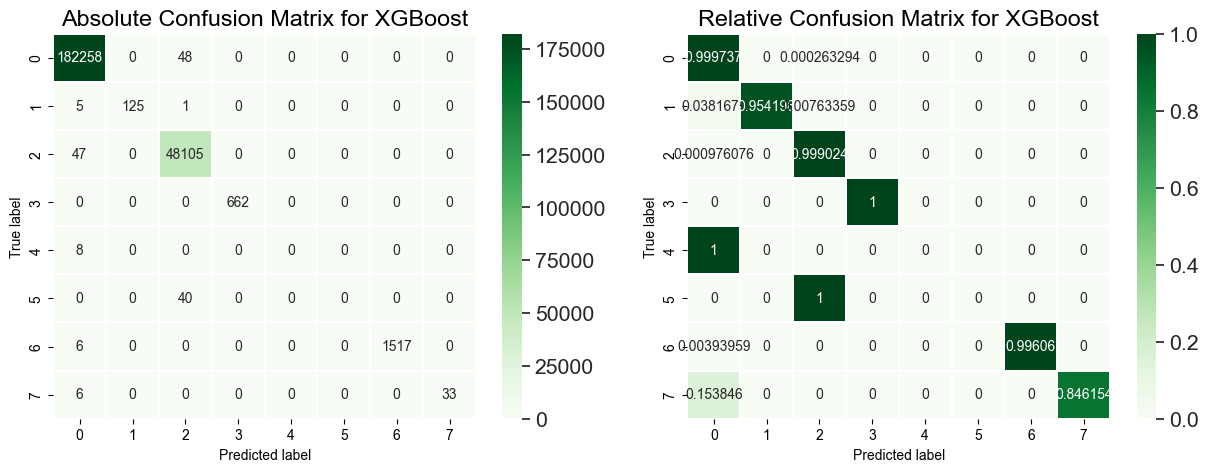

In [38]:
model = XGBoost_classification_tunned_old(best_hyperparams, X_train, X_test, y_train, y_test)

In [39]:

def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        # sm = SMOTE(random_state=100)
        # X_train, y_train = sm.fit_resample(X_train, y_train)
        # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [40]:
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=10)

9
              precision    recall  f1-score   support

      BENIGN     0.9997    0.9997    0.9997    182306
         Bot     1.0000    0.9695    0.9845       131
        DDoS     0.9982    0.9993    0.9987     48152
 FTP-Patator     1.0000    1.0000    1.0000       662
Infiltration     1.0000    0.2500    0.4000         8
    PortScan     0.0000    0.0000    0.0000        40
 SSH-Patator     1.0000    0.9967    0.9984      1523
  Web Attack     1.0000    0.8462    0.9167        39

    accuracy                         0.9994    232861
   macro avg     0.8747    0.7577    0.7872    232861
weighted avg     0.9992    0.9994    0.9993    232861



# Evaluation of model

In [41]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels

              precision    recall  f1-score   support

      BENIGN     0.9996    0.9999    0.9997     78316
         Bot     1.0000    1.0000    1.0000        62
        DDoS     0.9986    0.9988    0.9987     20666
 FTP-Patator     1.0000    1.0000    1.0000       267
Infiltration     0.0000    0.0000    0.0000         6
    PortScan     0.0000    0.0000    0.0000        21
 SSH-Patator     1.0000    0.9938    0.9969       644
  Web Attack     1.0000    0.9444    0.9714        18

    accuracy                         0.9994    100000
   macro avg     0.7498    0.7421    0.7458    100000
weighted avg     0.9991    0.9994    0.9992    100000



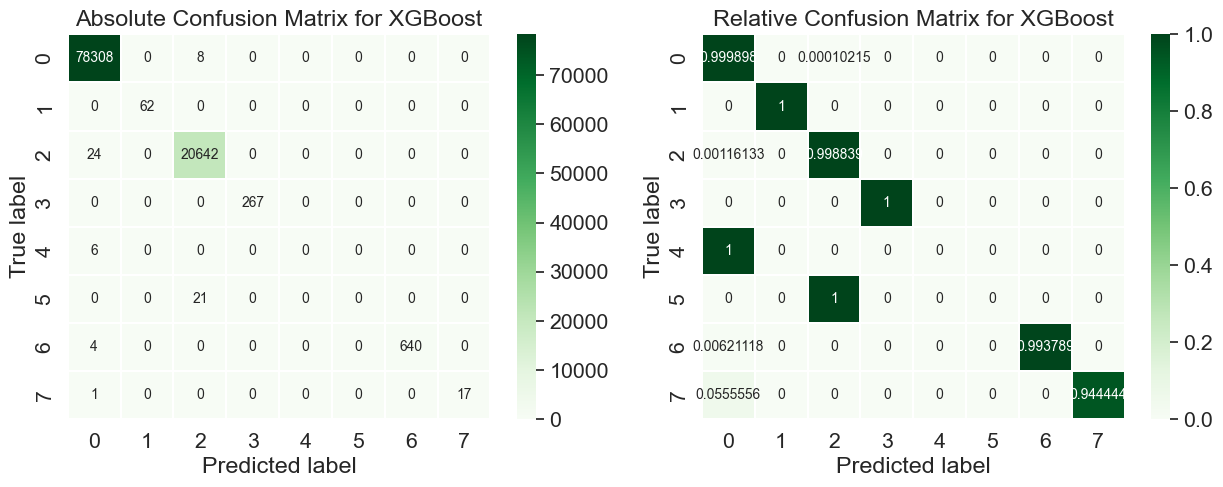

In [42]:
y_pred = best_model.predict(X_validation)

print(classification_report(y_validation, y_pred, target_names=classifications_array,digits=4))  # 

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

In [43]:
report = classification_report(y_validation, y_pred, target_names=classifications_array,digits=4)

import csv

problem = "IDS_CIC-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    report = classification_report(y_validation, y_pred, target_names=classifications_array, digits=4)
    tmp = report.split("weighted avg")
    tmp_2 = tmp[0].split("macro avg")
    accuracy = tmp_2[0].split("accuracy")[1].split()[0]
    _ = tmp_2[1].split()
    m_precision = _[0]
    m_recall = _[1]
    m_f1 = _[2]
    _ = tmp[1].split()
    w_precision = _[0]
    w_recall = _[1]
    w_f1 = _[2]
    writer.writerow([problem, "-", accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])

# Feature importance

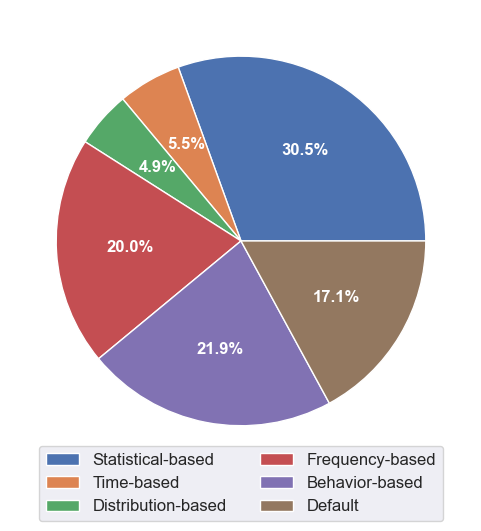

In [44]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()
f_def = feat_importances[default_faetures].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf, f_def]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based", "Default"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [45]:
data

[0.30517298, 0.05538407, 0.049256764, 0.20016813, 0.2193771, 0.17064095]

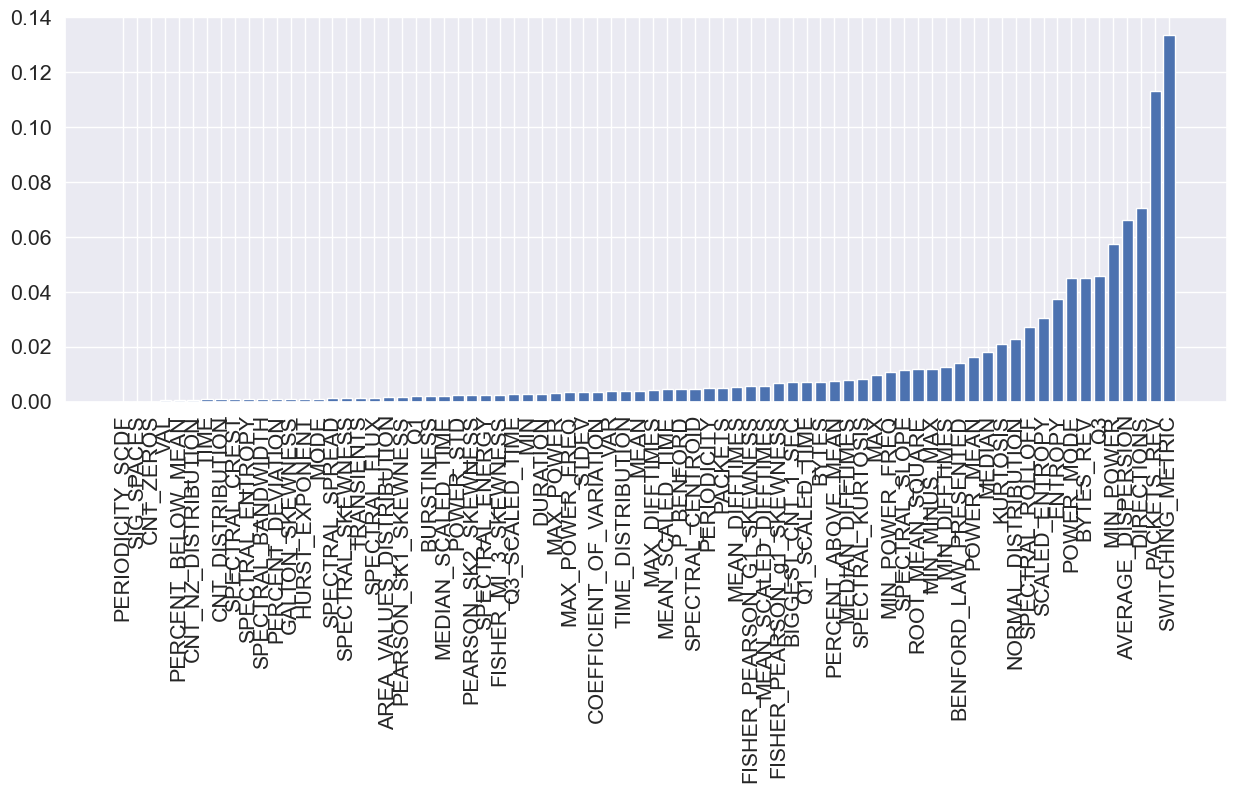

In [46]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [47]:
feat_importances

PERIODICITY_SCDF      0.000000
SIG_SPACES            0.000000
CNT_ZEROS             0.000000
VAL                   0.000453
PERCENT_BELOW_MEAN    0.000613
                        ...   
MIN_POWER             0.057322
AVERAGE_DISPERSION    0.066295
DIRECTIONS            0.070380
PACKETS_REV           0.113311
SWITCHING_METRIC      0.133562
Length: 76, dtype: float32

In [48]:
feat_importances.to_dict()

{'PERIODICITY_SCDF': 0.0,
 'SIG_SPACES': 0.0,
 'CNT_ZEROS': 0.0,
 'VAL': 0.00045309215784072876,
 'PERCENT_BELOW_MEAN': 0.0006130770780146122,
 'CNT_NZ_DISTRIBUTION': 0.0007248417823575437,
 'TIME': 0.0008029410382732749,
 'CNT_DISTRIBUTION': 0.0008739119512028992,
 'SPECTRAL_CREST': 0.0009226549882441759,
 'SPECTRAL_ENTROPY': 0.0009510175441391766,
 'SPECTRAL_BANDWIDTH': 0.0009837172692641616,
 'PERCENT_DEVIATION': 0.0010166865540668368,
 'GALTON_SKEWNESS': 0.0010857434244826436,
 'HURST_EXPONENT': 0.001139150932431221,
 'MODE': 0.001156626851297915,
 'SPECTRAL_SPREAD': 0.001180641003884375,
 'SPECTRAL_SKEWNESS': 0.0013878516620025039,
 'TRANSIENTS': 0.0013883940409868956,
 'SPECTRAL_FLUX': 0.001517808879725635,
 'AREA_VALUES_DISTRIBUTION': 0.0016056058229878545,
 'PEARSON_SK1_SKEWNESS': 0.0017730072140693665,
 'Q1': 0.001891349907964468,
 'BURSTINESS': 0.0021578369196504354,
 'MEDIAN_SCALED_TIME': 0.0022160049993544817,
 'POWER_STD': 0.0024983747862279415,
 'PEARSON_SK2_SKEWNESS': 0.

# FEATURE SELECTION

In [49]:
def perform_val(selected_features, cycles = 5, best_hyperparams=None):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(200000), selected_features, verbose=False)
    X_dos=df_features[selected_features]  # Features
    y_dos=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X_dos, y_dos, test_size=0.30, stratify=y_dos) # 70% training and 30% test
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            
    print(F1)

    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    
    report = classification_report(y_validation,y_pred)
    return report

In [50]:
import FEATURE_REDUCTED as FR
REPORTS = []


report = perform_val(FR.botnet_best_features)
REPORTS.append(report)
report = perform_val(FR.doh_best_features)
REPORTS.append(report)
report = perform_val(FR.dos_best_features)
REPORTS.append(report)
report = perform_val(FR.dns_malware_features)
REPORTS.append(report)
report = perform_val(FR.tor_features)
REPORTS.append(report)
report = perform_val(FR.vpn_features)
REPORTS.append(report)
report = perform_val(FR.all_best_features)
REPORTS.append(report)
report = perform_val(FR.combo_features)
REPORTS.append(report)
report = perform_val(FR.combo_2_features)
REPORTS.append(report)
report = perform_val(FR.crypto_features)
REPORTS.append(report)

100%|██████████| 100/100 [22:37<00:00, 13.57s/trial, best loss: -0.9981423345793341]
The best hyperparameters are :  

{'colsample_bytree': 0.18373504797827522, 'gamma': 1.192790095455379, 'max_depth': 40.0, 'min_child_weight': 6.0, 'n_estimators': 250.0, 'reg_alpha': 0.0, 'reg_lambda': 0.49970587330798083}
0.7397365973620632
100%|██████████| 100/100 [21:15<00:00, 12.75s/trial, best loss: -0.9987927799984455]
The best hyperparameters are :  

{'colsample_bytree': 0.5891294898529246, 'gamma': 2.3384776982122046, 'max_depth': 35.0, 'min_child_weight': 0.0, 'n_estimators': 350.0, 'reg_alpha': 0.0, 'reg_lambda': 0.32238586482163334}
0.7674044680761811
100%|██████████| 100/100 [24:12<00:00, 14.52s/trial, best loss: -0.9981949825150883]
The best hyperparameters are :  

{'colsample_bytree': 0.4560402819516892, 'gamma': 1.3472846933782883, 'max_depth': 30.0, 'min_child_weight': 9.0, 'n_estimators': 250.0, 'reg_alpha': 0.0, 'reg_lambda': 0.01813343889028335}
0.7369657666760218
100%|██████████|

In [51]:
problem = "IDS_CIC-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        tmp = report.split("weighted avg")
        tmp_2 = tmp[0].split("macro avg")
        accuracy = tmp_2[0].split("accuracy")[1].split()[0]
        _ = tmp_2[1].split()
        m_precision = _[0]
        m_recall = _[1]
        m_f1 = _[2]
        _ = tmp[1].split()
        w_precision = _[0]
        w_recall = _[1]
        w_f1 = _[2]
        writer.writerow([problem, f_set, accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])